In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from joblib import Parallel, delayed
from google.colab import files
import joblib
  

def save_model(model,model_name):
 joblib.dump(model, model_name)
  
def load_model(model_name):
  return joblib.load(model_name)

In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm

dataset=pd.read_excel("/content/drive/MyDrive/Sleep Stage 5 class/Refactored_Dataset.xlsx")


target="Sleep Stage"

classes = np.array(sorted(list(set(dataset[target]))))

In [ ]:
dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,DAR_G,DTR_F4,DTR_C4,DTR_O2,DTR_G,DTABR_F4,DTABR_C4,DTABR_O2,DTABR_G,P_G
0,W,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,18.191758,8.851240,5.786885,18.564103,11.067409,9.770492,3.833333,8.670455,7.424760,0.009177
1,W,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,16.621053,8.693548,5.173913,28.920000,14.262487,6.604396,3.155556,12.262295,7.340749,0.006355
2,W,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,15.327441,16.389831,7.090909,9.583333,11.021358,12.361446,4.188235,4.618182,7.055954,0.006283
3,W,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,4.718095,5.302326,3.600000,3.640000,4.180775,3.304878,2.067416,1.901639,2.424644,0.002777
4,W,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,8.542423,8.226415,3.921053,7.291667,6.479711,6.434211,2.527027,3.491228,4.150822,0.003691


In [ ]:
dataset.columns

Index(['Sleep Stage', 'MeanP_Alpha_F4', 'MedianF_Alpha_F4', 'MeanF_Alpha_F4',
       'Spectral Edge_Alpha_F4', 'PeakF_Alpha_F4', 'MeanP_Beta_F4',
       'MedianF_Beta_F4', 'MeanF_Beta_F4', 'Spectral Edge_Beta_F4',
       ...
       'DAR_G', 'DTR_F4', 'DTR_C4', 'DTR_O2', 'DTR_G', 'DTABR_F4', 'DTABR_C4',
       'DTABR_O2', 'DTABR_G', 'P_G'],
      dtype='object', length=112)

In [6]:
set(list(dataset[target]))

{'N1', 'N2', 'N3', 'R', 'W'}

In [ ]:
frequency = dataset["Sleep Stage"].value_counts()
print(frequency)

N2    39428
N3    21290
W     19354
R     16465
N1    11913
Name: Sleep Stage, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [8]:
set(list(dataset[target])) # alphabet wise

{0, 1, 2, 3, 4}

In [ ]:
frequency = y_test.value_counts()
print(frequency)

In [10]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
new_dataset=balance(X_test,y_test)

X_test = new_dataset.loc[:, new_dataset.columns!=target]
y_test = new_dataset[target]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=10000
k_range = range (500,N+1,500)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  5%|▌         | 1/20 [06:09<1:57:04, 369.73s/it]

500/10000 round completed......................... Accurecy: 0.7756569847856155


 10%|█         | 2/20 [18:17<2:54:08, 580.49s/it]

1000/10000 round completed......................... Accurecy: 0.7760719225449516


 15%|█▌        | 3/20 [36:35<3:51:26, 816.85s/it]

1500/10000 round completed......................... Accurecy: 0.7757030889810973


 20%|██        | 4/20 [1:00:59<4:45:51, 1071.99s/it]

2000/10000 round completed......................... Accurecy: 0.7764407561088059


 25%|██▌       | 5/20 [1:31:19<5:35:29, 1341.97s/it]

2500/10000 round completed......................... Accurecy: 0.7764407561088059


  3%|▎         | 1/31 [01:26<43:06, 86.22s/it]

30/60 round completed......................... Accurecy: 0.7305972045743329


  6%|▋         | 2/31 [02:52<41:40, 86.23s/it]

31/60 round completed......................... Accurecy: 0.729428208386277


 10%|▉         | 3/31 [04:19<40:31, 86.82s/it]

32/60 round completed......................... Accurecy: 0.7312579415501906


 13%|█▎        | 4/31 [05:47<39:09, 87.01s/it]

33/60 round completed......................... Accurecy: 0.728843710292249


 16%|█▌        | 5/31 [07:14<37:42, 87.04s/it]

34/60 round completed......................... Accurecy: 0.7306226175349428


 19%|█▉        | 6/31 [08:42<36:23, 87.33s/it]

35/60 round completed......................... Accurecy: 0.7289961880559085


 23%|██▎       | 7/31 [10:08<34:44, 86.85s/it]

36/60 round completed......................... Accurecy: 0.7304447268106734


 26%|██▌       | 8/31 [11:32<33:02, 86.20s/it]

37/60 round completed......................... Accurecy: 0.7301905972045744


 29%|██▉       | 9/31 [12:58<31:29, 85.88s/it]

38/60 round completed......................... Accurecy: 0.7312325285895807


 32%|███▏      | 10/31 [14:23<29:57, 85.58s/it]

39/60 round completed......................... Accurecy: 0.7301143583227446


 35%|███▌      | 11/31 [15:47<28:25, 85.28s/it]

40/60 round completed......................... Accurecy: 0.7312325285895807


 39%|███▊      | 12/31 [17:11<26:53, 84.94s/it]

41/60 round completed......................... Accurecy: 0.7311817026683609


 42%|████▏     | 13/31 [18:36<25:29, 84.96s/it]

42/60 round completed......................... Accurecy: 0.7315628970775095


 45%|████▌     | 14/31 [20:01<24:01, 84.78s/it]

43/60 round completed......................... Accurecy: 0.7313087674714104


 48%|████▊     | 15/31 [21:25<22:35, 84.75s/it]

44/60 round completed......................... Accurecy: 0.7310038119440915


 52%|█████▏    | 16/31 [22:51<21:16, 85.11s/it]

45/60 round completed......................... Accurecy: 0.7303684879288437


 55%|█████▍    | 17/31 [24:23<20:17, 86.99s/it]

46/60 round completed......................... Accurecy: 0.730292249047014


 58%|█████▊    | 18/31 [25:50<18:53, 87.21s/it]

47/60 round completed......................... Accurecy: 0.7303939008894537


 61%|██████▏   | 19/31 [27:17<17:24, 87.05s/it]

48/60 round completed......................... Accurecy: 0.7304955527318933


 65%|██████▍   | 20/31 [28:46<16:03, 87.62s/it]

49/60 round completed......................... Accurecy: 0.7305463786531131


 68%|██████▊   | 21/31 [30:14<14:38, 87.87s/it]

50/60 round completed......................... Accurecy: 0.7304193138500635


 71%|███████   | 22/31 [31:41<13:07, 87.47s/it]

51/60 round completed......................... Accurecy: 0.7307750952986023


 74%|███████▍  | 23/31 [33:08<11:38, 87.34s/it]

52/60 round completed......................... Accurecy: 0.7307750952986023


 77%|███████▋  | 24/31 [34:35<10:10, 87.24s/it]

53/60 round completed......................... Accurecy: 0.7307750952986023


 81%|████████  | 25/31 [36:01<08:41, 86.97s/it]

54/60 round completed......................... Accurecy: 0.7307750952986023


 84%|████████▍ | 26/31 [37:27<07:13, 86.62s/it]

55/60 round completed......................... Accurecy: 0.7307750952986023


 87%|████████▋ | 27/31 [38:53<05:45, 86.45s/it]

56/60 round completed......................... Accurecy: 0.7307750952986023


 90%|█████████ | 28/31 [40:20<04:20, 86.69s/it]

57/60 round completed......................... Accurecy: 0.7307750952986023


 94%|█████████▎| 29/31 [41:48<02:53, 86.84s/it]

58/60 round completed......................... Accurecy: 0.7307750952986023


 97%|█████████▋| 30/31 [43:15<01:26, 86.99s/it]

59/60 round completed......................... Accurecy: 0.7307750952986023


100%|██████████| 31/31 [44:42<00:00, 86.54s/it]

60/60 round completed......................... Accurecy: 0.7307750952986023
The best Depth:
42


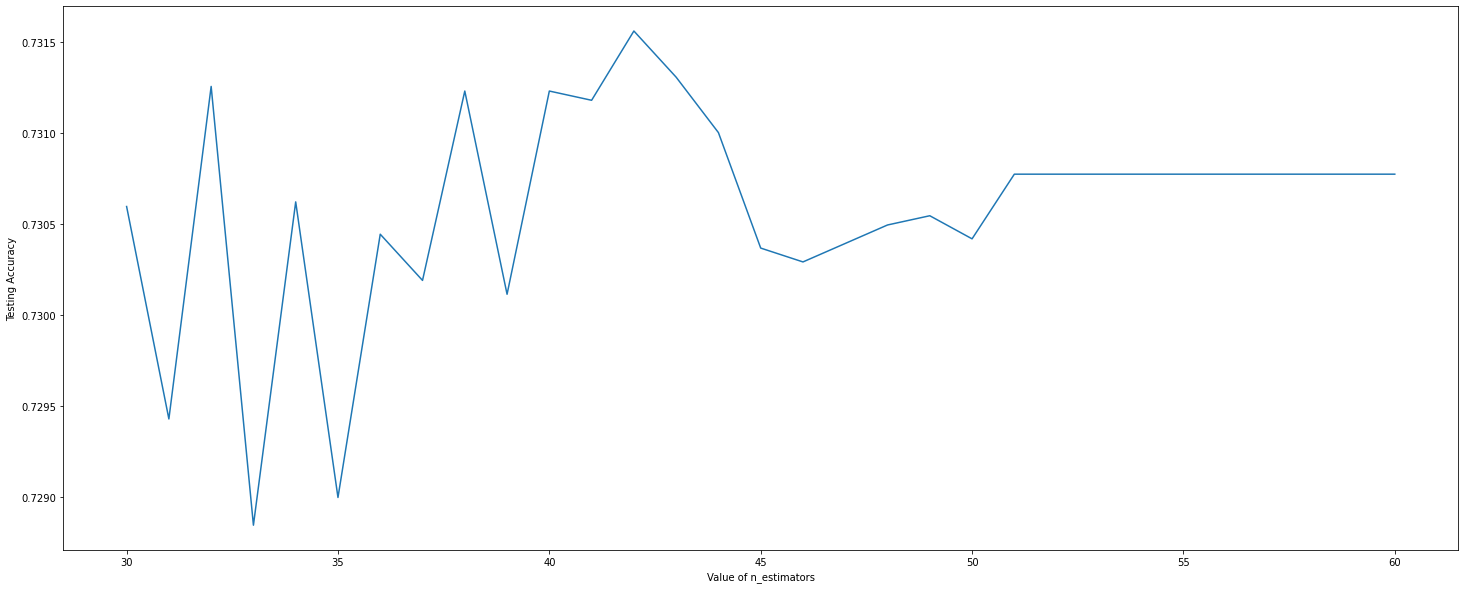

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=60
k_range = range (30,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_estimator,"Best_est_"+str(rf_estimator))
#files.download("max_depth_"+str(rf_estimator)) '''

'from sklearn.ensemble import RandomForestClassifier\nrf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)\nrf_estimator.fit(X_train, y_train)\ny_pred=rf_estimator.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\n\nsave_model(rf_estimator,"Best_est_"+str(rf_estimator))\n#files.download("max_depth_"+str(rf_estimator)) '

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_depth,"max_depth_"+str(rf_depth))
#files.download("max_depth_"+str(rf_depth)) 

[[2454 2512   26 1166 1733]
 [ 165 6784  456  279  207]
 [  13 1360 6465    3   50]
 [ 239 1008   44 6460  140]
 [ 369  317   16   62 7127]]
              precision    recall  f1-score   support

           0       0.76      0.31      0.44      7891
           1       0.57      0.86      0.68      7891
           2       0.92      0.82      0.87      7891
           3       0.81      0.82      0.81      7891
           4       0.77      0.90      0.83      7891

    accuracy                           0.74     39455
   macro avg       0.77      0.74      0.73     39455
weighted avg       0.77      0.74      0.73     39455

Accurecy:  0.7423647193004689


In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_all,"All_"+str(rf_all))
#files.download("max_depth_"+str(rf_all)) '''

'from sklearn.ensemble import RandomForestClassifier\nrf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)\nrf_all.fit(X_train, y_train)\ny_pred=rf_all.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\n\nsave_model(rf_all,"All_"+str(rf_all))\n#files.download("max_depth_"+str(rf_all)) '